## Convolutional Networks + Dense applied in radio records using Spectrograms

    Authors: Fernanda Ferreira and Victor Paganotto
    Professor: Tiago F. Tavares
    
    date: Feb/2019

# Conv2D + Maxpooling + Dense building

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras import backend as K
from sklearn.externals import joblib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# ------------------- 10seg --------------------------
# x_train_np = joblib.load("10seg/features/x_train.pkl")
# x_test_np = joblib.load("10seg/features/x_test.pkl")
# x_val_np = joblib.load("10seg/features/x_val.pkl")
# y_train_np = joblib.load("10seg/features/y_train.pkl")
# y_test_np = joblib.load("10seg/features/y_test.pkl")
# y_val_np = joblib.load("10seg/features/y_val.pkl")

# ------------------- 2seg --------------------------
x_train_np = joblib.load("2seg/features/x_train.pkl")
x_test_np = joblib.load("2seg/features/x_test.pkl")
x_val_np = joblib.load("2seg/features/x_val.pkl")
y_train_np = joblib.load("2seg/features/y_train.pkl")
y_test_np = joblib.load("2seg/features/y_test.pkl")
y_val_np = joblib.load("2seg/features/y_val.pkl")


In [3]:
x_train_np = np.array(x_train_np)
x_test_np = np.array(x_test_np)
x_val_np = np.array(x_val_np)

y_train_np = np.array(y_train_np)
y_test_np = np.array(y_test_np)
y_val_np = np.array(y_val_np)

In [4]:
# input image dimensions
img_rows = x_train_np.shape[1]
img_cols = x_train_np.shape[2]

if K.image_data_format() == 'channels_first':
    x_train_np = x_train_np.reshape(x_train_np.shape[0], 1, img_rows, img_cols)
    x_val_np = x_val_np.reshape(x_val_np.shape[0], 1, img_rows, img_cols)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_np = x_train_np.reshape(x_train_np.shape[0], img_rows, img_cols, 1)
    x_val_np = x_val_np.reshape(x_val_np.shape[0], img_rows, img_cols, 1)
    x_test_np = x_test_np.reshape(x_test_np.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_np = x_train_np.astype('float32')
x_val_np = x_val_np.astype('float32')
x_test_np = x_test_np.astype('float32')
x_train_np /= 255
x_val_np /= 255
x_test_np /= 255
print('x_train shape:', x_train_np.shape)
print(x_train_np.shape[0], 'train samples')
print(x_val_np.shape[0], 'val samples')
print(x_test_np.shape[0], 'test samples')
print (input_shape)



x_train shape: (4065, 251, 227, 1)
4065 train samples
1017 val samples
5007 test samples
(251, 227, 1)


In [5]:
print ('y_train shape:', y_train_np.shape)
num_classes = 2
y_train_np = keras.utils.to_categorical(y_train_np, num_classes)
y_test_np = keras.utils.to_categorical(y_test_np, num_classes)
y_val_np = keras.utils.to_categorical(y_val_np, num_classes)

print ('y_train shape:', y_train_np.shape)

y_train shape: (4065,)
y_train shape: (4065, 2)


In [6]:
batch_size = 20
epochs = 20

In [7]:
model = Sequential()
# Input Layer
input_shape=input_shape
# Hidden Layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 249, 225, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 110, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 55, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 53, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12064)             0         
__________

In [8]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [9]:
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='categorical_crossentropy', metrics=[f1], optimizer='adam')
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [10]:
history = model.fit(x_train_np, y_train_np,
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_val_np, y_val_np), callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')])

Train on 4065 samples, validate on 1017 samples
Epoch 1/20
4065/4065 [==============================] - 32s 8ms/step - loss: 0.4394 - f1: 0.7941 - val_loss: 0.3691 - val_f1: 0.8378
Epoch 2/20
4065/4065 [==============================] - 29s 7ms/step - loss: 0.3195 - f1: 0.8713 - val_loss: 0.3368 - val_f1: 0.8604
Epoch 3/20
4065/4065 [==============================] - 29s 7ms/step - loss: 0.2959 - f1: 0.8888 - val_loss: 0.3211 - val_f1: 0.8761
Epoch 4/20
4065/4065 [==============================] - 29s 7ms/step - loss: 0.2413 - f1: 0.9154 - val_loss: 0.2583 - val_f1: 0.8958
Epoch 5/20
4065/4065 [==============================] - 28s 7ms/step - loss: 0.2205 - f1: 0.9242 - val_loss: 0.2599 - val_f1: 0.9017
Epoch 6/20
4065/4065 [==============================] - 29s 7ms/step - loss: 0.1835 - f1: 0.9373 - val_loss: 0.2227 - val_f1: 0.9086
Epoch 7/20
4065/4065 [==============================] - 29s 7ms/step - loss: 0.1633 - f1: 0.9419 - val_loss: 0.1929 - val_f1: 0.9253
Epoch 8/20
4065/4065 

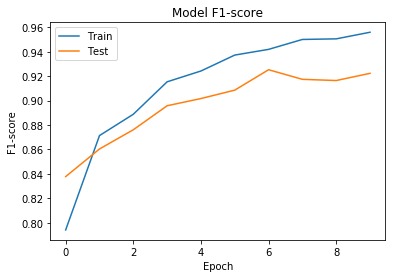

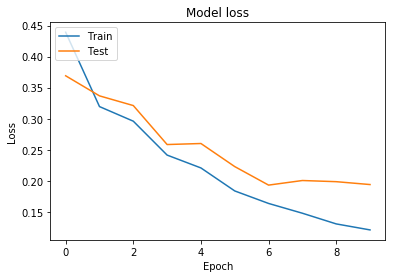

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
#score = model.evaluate(x_test_np, y_test_np, verbose=1)
score = model.evaluate(x_test_np, y_test_np, batch_size=10, verbose=1)
print('Test loss:', score[0])
print('Test F1:', score[1])



5007/5007 [==============================] - 14s 3ms/step
Test loss: 0.9000407950589941
Test F1: 0.6832434204713013


## References

- https://stackoverflow.com/questions/43906048/keras-early-stopping
- https://keras.io/callbacks/